# Section-1 Loading Data to Train the First Dummy Model

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


In [2]:
df_train = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
df_test = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')

In [3]:
df_train.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [4]:
X = df_train.drop('target', axis =1)
y = df_train['target']

from sklearn.dummy import DummyClassifier
model  = DummyClassifier().fit(X,y)

y_pred = model.predict(df_test)

submission = pd.DataFrame({'id' : range(0, df_test.shape[0]),
                            'target': y_pred})

submission.to_csv('submission.csv', index =False)

# Section-2 Performing Exploratory Data Analysis¶

### Looking for the Count of Numerical and Categorical Data Types

In [5]:
numerical_features = [feature for feature in df_train.columns if df_train[feature].dtype != 'O']
print('Num of Numerical Features :', len(numerical_features))

Num of Numerical Features : 6


In [6]:
categorical_features = [feature for feature in df_train.columns if df_train[feature].dtype == 'O']
print('Num of Categorical Features :', len(categorical_features))

Num of Categorical Features : 10


## Performing Univariate  Analysis for the Numerical Features and Presenting their Insights 

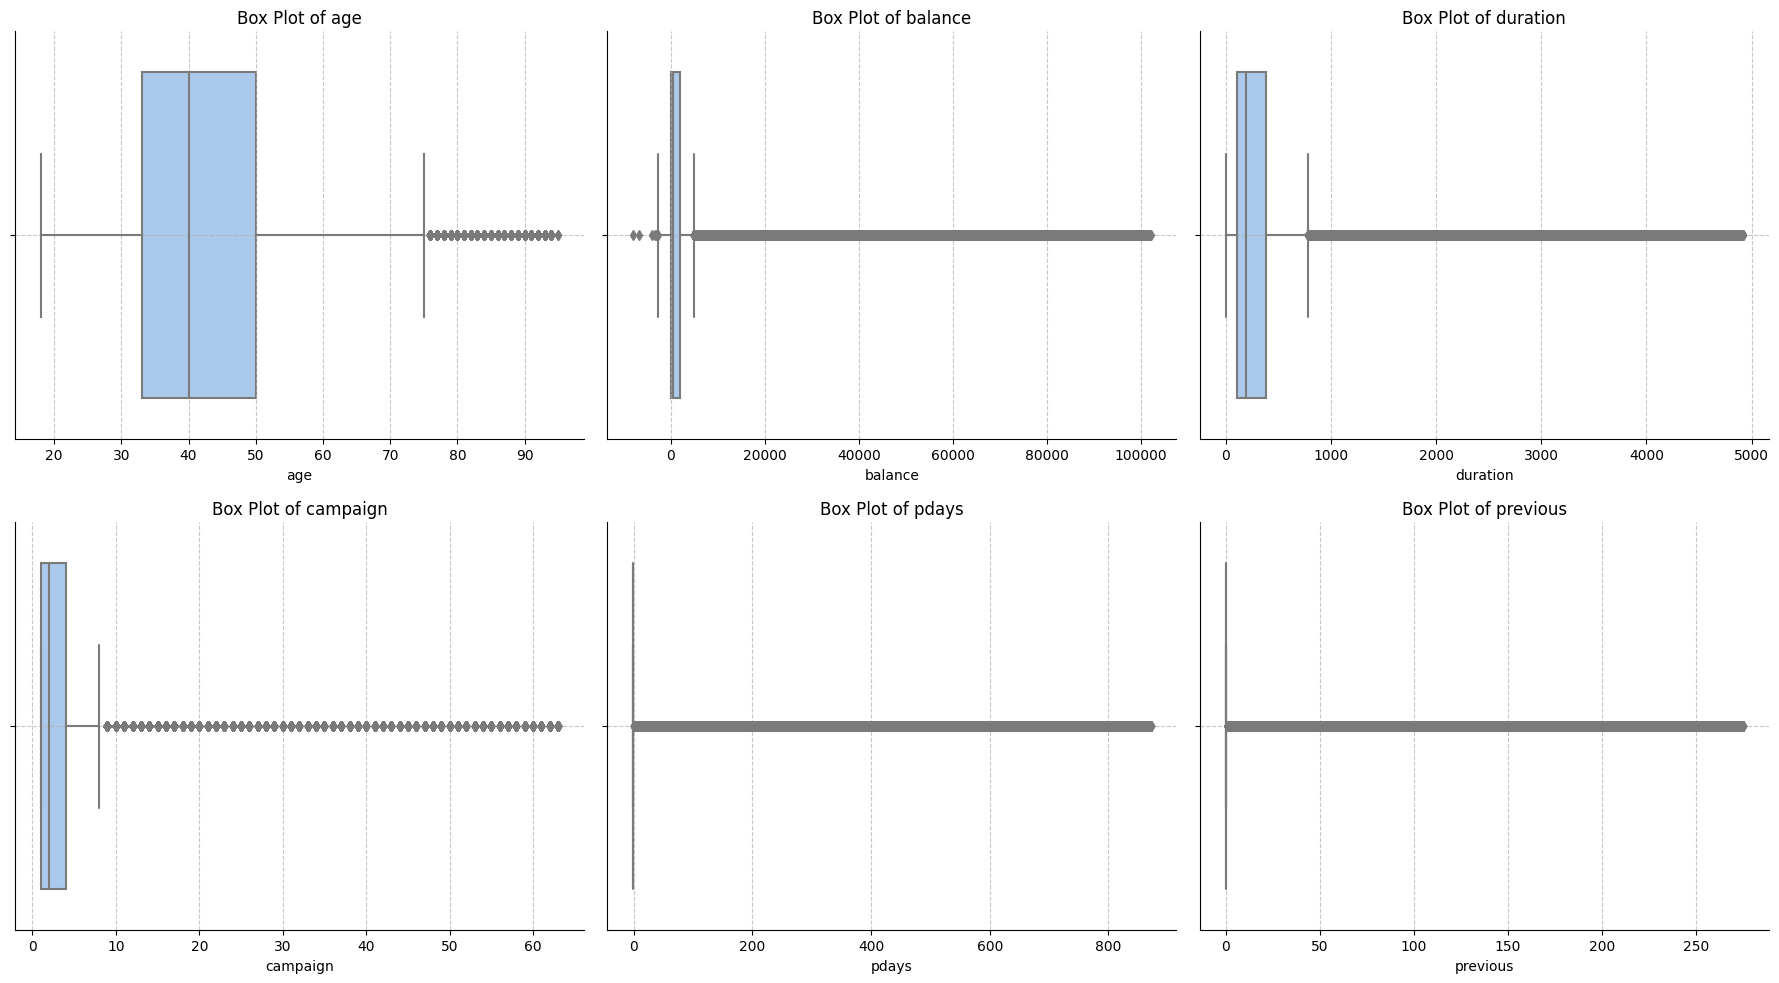

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of rows and columns
nrows, ncols = 2, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each numerical feature and plot in the appropriate subplot
for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df_train, x=feature, ax=axes[i], palette="pastel")
    sns.set_theme(style='ticks')
    sns.despine()
    axes[i].set_title(f"Box Plot of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("")
    axes[i].grid(True, linestyle='--', alpha=0.7)

# Hide any unused subplots (if applicable)
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the final plot
plt.show()


* balance: average yearly balance, in euros (numeric)
* duration: last contact duration, in seconds (numeric)
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)

## Observations from Box Plots Displayed Above

**1** **Age**:
* **Box Details**: The interquartile range (IQR) spans from around 32 to 50 years, indicating that most individuals fall within this age range are targeted in this campaign.
* **Outliers**: Beyond 75 years, there are a few outliers, indicating a small number of older individuals in the dataset where also contacted during the campaign.
* **Trend**: The age distribution is concentrated in middle-aged individuals, with fewer younger or older participants.

**2** **Balance**:
* **Box Details**: The IQR is narrow, suggesting most balances are concentrated near the median of zero
* **Outliers**: Many points far from the whiskers highlight the presence of individuals with exceptionally high balances
* **Trend** : While  the campaign majorly focuses in acquiring new customers with zero balances extraordinary high balances where also not left behind while caimpaining

**3** **Duration**:
* **Box Details**:The IQR shows call durations typically fall between 100 and 300 seconds.
* **Outliers**: Extreme durations beyond 800 seconds suggest a few long calls.
* **Trend**: Most calls are relatively short, but some customers experience much longer interaction times.

**4** **Campaign**:
* **Box Details**: The IQR spans fewer campaigns, indicating that most customers are contacted only a small number of times (less than 8).
* **Outliers**: Few customers are contacted more than 10 times, which is excessive and could indicate the potential customer that can be subscibe to the term deposit.
* **Trend**: A small number of individuals are over-contacted compared to the majority.

**5** **Pdays**:
* **Box Details**: Most data points are concentrated near 0, as the IQR is very narrow.
* **Outliers**: A significant number of points beyond the whiskers suggest irregular delays since the  past contacts.
* **Trend**: The majority have minimal delays, but outliers indicate long periods without contact for some customers.

**6** **Previous**:
* **Box Details**: Most data points (IQR) suggest most customers with no previous contact history where targeted.
* **Outliers**: Extreme outliers up to 270 suggest some customers were repeatedly contacted in prior campaigns where also kept infocus for this campaign.
* **Trend**: A majority of customers have minimal past interactions, but a small group has an unusually high number of prior contacts.

* **Summary** :The campaign primarily targets middle-aged individuals (32–50 years) with limited outreach to younger or older populations. It focuses on customers with zero balances while also engaging high-balance individuals to balance acquisition and retention. Most calls are brief (100–300 seconds), with occasional longer conversations for specific prospects. The majority of customers are contacted fewer than eight times, but a small group of high-potential leads receives repeated outreach. Additionally, the campaign targets customers with no prior interactions while keeping high-contact prospects in focus for potential conversion.

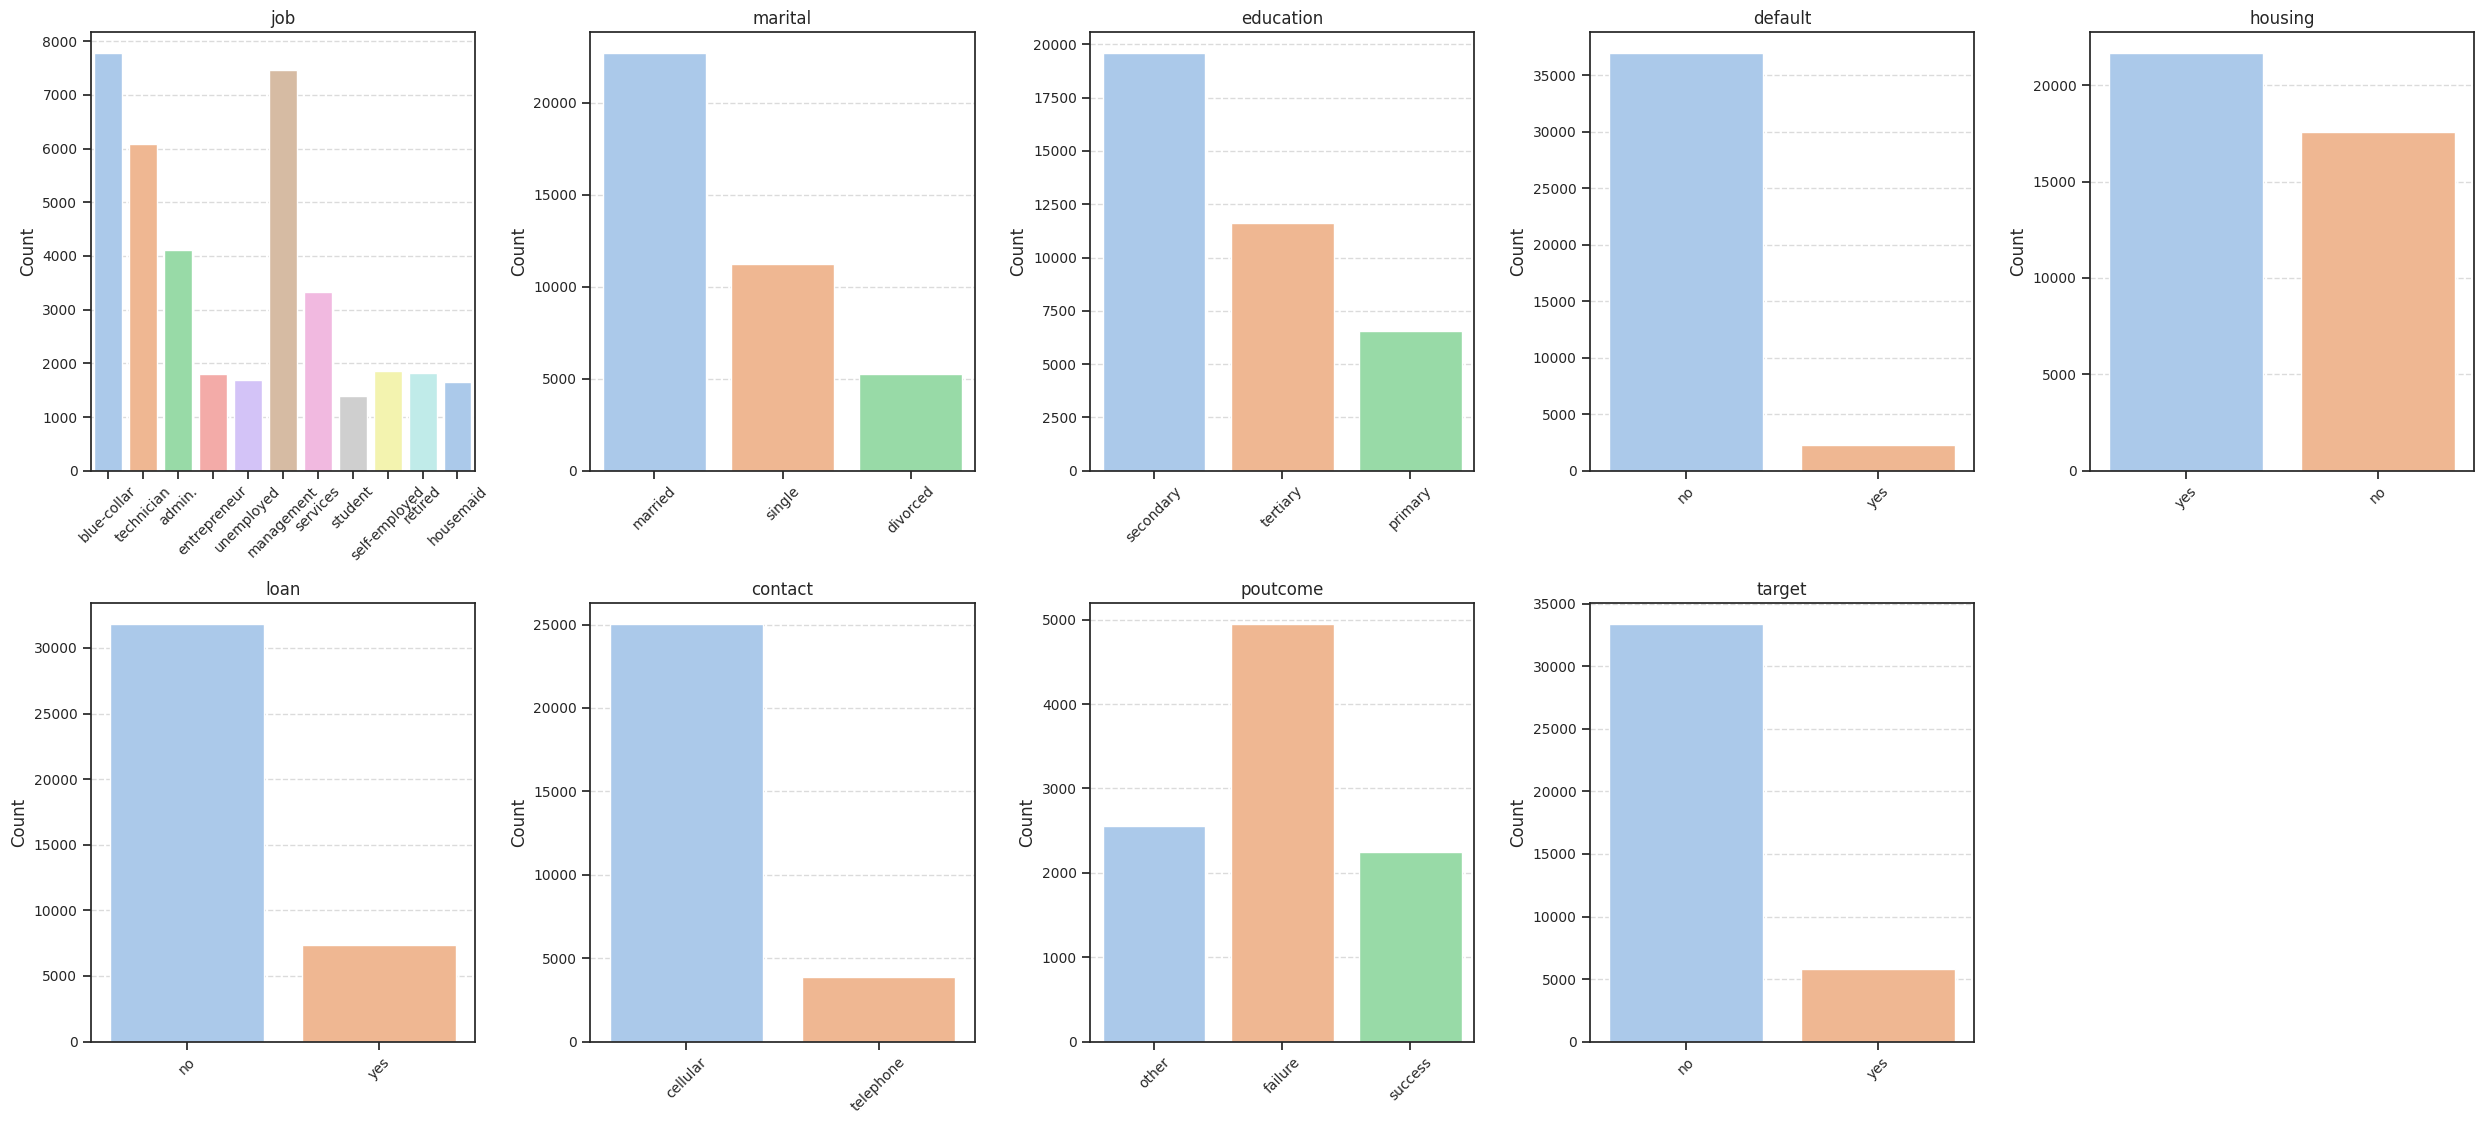

In [8]:
categorical_features = categorical_features[1:]  # Exclude the first column for contact date
# Plot bar charts for each categorical feature
# Set the number of rows and columns for subplots
ncols = 5
nrows = -(-len(categorical_features) // ncols)  # Calculate rows needed (ceiling division)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, nrows * 6))
axes = axes.flatten()

# Plot bar charts for each categorical feature
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df_train, x=feature, palette="pastel", ax=axes[i])
    axes[i].set_title(f"{feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)  # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Hide unused subplots if the number of features is less than the grid size
for j in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Key Summary from the Observations of the Categorical Features Univariate Analysis

**Summary**

* The dataset reflects a majority of middle-class working individuals (administrative, blue-collar, technicians) with secondary or tertiary education. Most individuals are married and without any credit in default or personal loans. Communication predominantly occurs via cellular phones, with limited success in previous campaigns and a significant focus on individuals who initially failed to subscribe to term deposits.

# Plotting Correlation Heat Map between Numerical Features

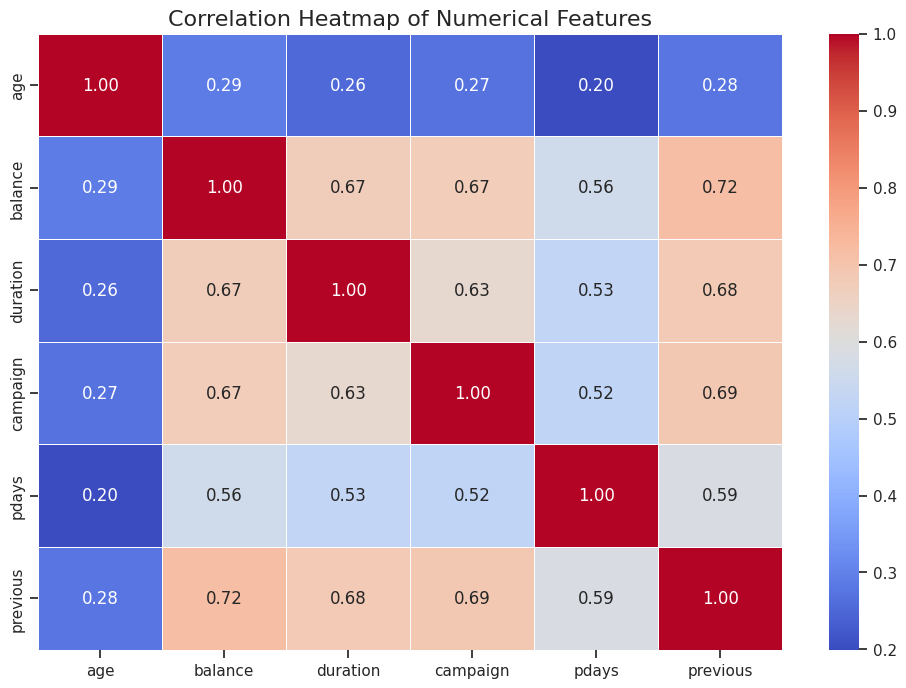

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_df = df_train.select_dtypes(include=[np.number])

# Compute the correlation matrix for numerical features
correlation_matrix = numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)

# Show the plot
plt.show()


### Overall Insights
* Strong Correlations in Campaign Targeting: Variables related to previous interactions (like previous, pdays, and duration) tend to be positively correlated, indicating that campaign targeting is perhaps more intense with clients with a history of engagement.
* Possible Focus on Valuable Clients: The significant correlations involving balance may indicate that clients with higher balances are targeted more often and receive longer call durations, suggesting a strategy focusing on clients with higher balances

# Correlation of Numerical Features with the Target

* **Point Biserial Correlation** is a statistical method used to measure the strength and direction of the association between a binary variable (categorical with two levels) and a continuous variable (numerical). It is a specialized form of the Pearson correlation coefficient.

In [10]:
from scipy.stats import pointbiserialr

# Compute point biserial correlation for each numerical feature
target_binary = df_train['target'].map({'yes': 1, 'no': 0})  # Convert 'yes/no' to 1/0
numerical_features = [col for col in df_train.select_dtypes(include=['number']).columns]

correlations = {}
for feature in numerical_features:
    corr, _ = pointbiserialr(df_train[feature], target_binary)
    correlations[feature] = corr

# Sort features by correlation with target
sorted_corr = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
print("Correlation of numerical features with target:")
for feature, corr in sorted_corr:
    print(f"{feature}: {corr:.3f}")


Correlation of numerical features with target:
duration: 0.343
previous: 0.263
pdays: 0.258
balance: 0.258
campaign: 0.217
age: 0.112


## Insights

1. **duration** is the most predictive feature: It should be retained and considered as a key variable in the model.

2. **previous**, **pdays**, and **balance** have moderate predictive power: These features are relevant and should likely be retained in the model.
   
3. **campaign** has weak predictive power:It may still contribute to the model but is less significant than the top features.

4. **age** is the least predictive: It might not be as relevant for predicting the target variable and could potentially be dropped if feature reduction is needed.

## Variance Inflation Factor (VIF):
* The Variance Inflation Factor (VIF) is a statistical measure used to detect the presence of multicollinearity in regression models. Multicollinearity occurs when two or more independent (predictor) variables are highly correlated, which can make it difficult to assess the individual effect of each predictor on the target variable.

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select the numerical features to check for multicollinearity
numerical_features = ['previous', 'pdays', 'balance']  # Example features
X = df_train[numerical_features].copy()  # Create a copy to avoid modifying the original DataFrame

# Add a constant for the VIF calculation
X['constant'] = 1  # statsmodels requires a constant for VIF computation

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop the constant row
vif_data = vif_data[vif_data['Feature'] != 'constant']

print(vif_data)


    Feature       VIF
0  previous  2.287905
1     pdays  1.626088
2   balance  2.195433


## Insights from VIF Analysis:

**Low Multicollinearity Across Predictors**:

All VIF values are below the critical threshold of 5, indicating no severe multicollinearity among the predictors (previous, pdays, balance). All three predictors can be safely retained in the model.

# Section-3 Feature Engineering

## Step-1

In [12]:
df_train['poutcome'] = df_train['poutcome'].replace('other', 'failure')
df_test['poutcome'] = df_train['poutcome'].replace('other', 'failure')
df_train['poutcome'].value_counts()
df_test['poutcome'].value_counts()

poutcome
failure    1864
success     568
Name: count, dtype: int64

# Insights
* In the outcome of the previous marketing campaign (poutcome), there is a category labeled "other." For the purpose of simplifying the analysis, I have categorized "other" as a failure, as I aim to classify the campaign outcome into two groups: success and failure.

## Step-2

### Combining Multiple Features namely 'housing', 'Loan' and 'default' to create a new variable called 'risk_tier'

In [13]:
def categorize_financial_profile(row):
    if row['default'] == 'yes':
        return 'High Risk'
    elif row['housing'] == 'yes' and row['loan'] == 'yes':
        return 'Medium Risk'
    elif row['housing'] == 'yes' or row['loan'] == 'yes':
        return 'Low Risk'
    else:
        return 'No Risk'

# Apply the function to create a new feature
df_train['risk_tier'] = df_train.apply(categorize_financial_profile, axis=1)
df_test['risk_tier'] = df_test.apply(categorize_financial_profile, axis=1)

# View value counts
print(df_train['risk_tier'].value_counts())
print(df_test['risk_tier'].value_counts())

risk_tier
Low Risk       19316
No Risk        13889
Medium Risk     3749
High Risk       2257
Name: count, dtype: int64
risk_tier
Low Risk       4869
No Risk        3611
Medium Risk     959
High Risk       561
Name: count, dtype: int64


## Logic Behind Creating this new variable called 'risk_tier'

1. If the client has a default (default = yes), they are categorized as 'High Risk' regardless of their housing or loan status.
2. If the client has both a housing loan and a personal loan, they are categorized as 'Medium Risk'.
3. If the client has either a housing loan or a personal loan (but not both), they are categorized as 'Low Risk'.
4. If none of the above conditions are met (i.e., default = no, housing = no, loan = no), the client is categorized as 'No Risk'.

#### Once the new variable 'risk_tier' is derived, the variables default, loan, and housing are dropped from the dataset to avoid redundancy and ensure simplicity in the analysis.

In [14]:
df_train = df_train.drop(columns=['default', 'housing', 'loan'])

# Drop the columns from the testing dataset
df_test = df_test.drop(columns=['default', 'housing', 'loan'])

# Verify the columns have been dropped
print(df_train.head())
(df_test.head())

  last contact date  age           job  marital  education  balance  \
0        2009-04-17   26   blue-collar  married  secondary      647   
1        2009-10-11   52    technician  married  secondary      553   
2        2010-11-20   44   blue-collar  married  secondary     1397   
3        2009-09-01   33        admin.  married  secondary      394   
4        2008-01-29   31  entrepreneur   single   tertiary      137   

     contact  duration  campaign  pdays  previous poutcome target risk_tier  
0   cellular       357         2    331         1  failure     no  Low Risk  
1  telephone       160         1     -1         0      NaN     no  Low Risk  
2   cellular       326         1     -1         0      NaN     no   No Risk  
3  telephone       104         3     -1         0      NaN     no  Low Risk  
4   cellular       445         2     -1         0      NaN     no   No Risk  


,last contact date,age,job,marital,education,balance,contact,duration,campaign,pdays,previous,poutcome,risk_tier
0,2009-11-21,36,management,single,tertiary,7,NaN,20,1,-1,0,failure,No Risk
1,2010-02-04,30,unemployed,married,tertiary,1067,cellular,78,2,-1,0,NaN,No Risk
2,2010-07-28,32,blue-collar,single,secondary,82,cellular,86,4,-1,0,NaN,Low Risk
3,2010-06-09,38,admin.,married,primary,1487,NaN,332,2,-1,0,NaN,No Risk
4,2008-03-02,59,management,married,tertiary,315,cellular,591,1,176,2,NaN,No Risk


# Section-4 Data Preprocessing

### Checking for the Null Values

In [15]:
df_train.isnull().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
balance                  0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
risk_tier                0
dtype: int64

In [16]:

# For the training dataset
df_train['poutcome'] = df_train['poutcome'].fillna('failure')
df_train['contact'] = df_train['contact'].fillna('Unknown')
df_train['education'] = df_train['education'].fillna('Unknown')
df_train['job'] = df_train['job'].fillna('Unknown')

# For the testing dataset
df_test['poutcome'] = df_test['poutcome'].fillna('failure')
df_test['contact'] = df_test['contact'].fillna('Unknown')
df_test['education'] = df_test['education'].fillna('Unknown')
df_test['job'] = df_test['job'].fillna('Unknown')


## Insights

* The mode represents the "typical" value in a categorical column but it also leads to overrepresentation of the most frequent category. 

* Hence new category called 'Unknown' is explicitly used to indicate the missing values

### Checking the Succesfull Imputation of the Null Values for the test and train dataset

In [17]:
df_train.isnull().sum()

last contact date    0
age                  0
job                  0
marital              0
education            0
balance              0
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
target               0
risk_tier            0
dtype: int64

In [18]:
df_test.isnull().sum()

last contact date    0
age                  0
job                  0
marital              0
education            0
balance              0
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
risk_tier            0
dtype: int64

## 'last_contact_date' Column Preprocessing

* There is a column called '**last_contact_date**' which has a format of (eg: 2009-11-21). I wanted a numerical representation of this hence I used time stamp functionality of pandas to do so

In [19]:
# Convert the date to a timestamp
import pandas as pd

# Convert 'last contact date' to datetime format
df_train['last contact date'] = pd.to_datetime(df_train['last contact date'])
df_test['last contact date'] = pd.to_datetime(df_test['last contact date'])

# Convert the date to a numerical timestamp
df_train['last_contact_timestamp'] = df_train['last contact date'].apply(lambda x: x.timestamp())
df_test['last_contact_timestamp'] = df_test['last contact date'].apply(lambda x: x.timestamp())

df_train = df_train.drop(columns=['last contact date'])
df_test = df_test.drop(columns=['last contact date'])

# Display the first few rows of the DataFrame to verify
df_test.head()


,age,job,marital,education,balance,contact,duration,campaign,pdays,previous,poutcome,risk_tier,last_contact_timestamp
0,36,management,single,tertiary,7,Unknown,20,1,-1,0,failure,No Risk,1.258762e+09
1,30,unemployed,married,tertiary,1067,cellular,78,2,-1,0,failure,No Risk,1.265242e+09
2,32,blue-collar,single,secondary,82,cellular,86,4,-1,0,failure,Low Risk,1.280275e+09
3,38,admin.,married,primary,1487,Unknown,332,2,-1,0,failure,No Risk,1.276042e+09
4,59,management,married,tertiary,315,cellular,591,1,176,2,failure,No Risk,1.204416e+09


# Section-5 Creating Column Transformer

In [20]:
X_train = pd.DataFrame(df_train.drop(['target'], axis=1))  ## DROP THE TARGET COLUMN AS WELL AS THE LAST CONTACT DATE SINCE THEY...
## SEEMED IRRELEVANT FOR THE MODEL PREDICTION

y_train = df_train['target']

X_test = pd.DataFrame(df_test)


In [21]:
X_test.head()

,age,job,marital,education,balance,contact,duration,campaign,pdays,previous,poutcome,risk_tier,last_contact_timestamp
0,36,management,single,tertiary,7,Unknown,20,1,-1,0,failure,No Risk,1.258762e+09
1,30,unemployed,married,tertiary,1067,cellular,78,2,-1,0,failure,No Risk,1.265242e+09
2,32,blue-collar,single,secondary,82,cellular,86,4,-1,0,failure,Low Risk,1.280275e+09
3,38,admin.,married,primary,1487,Unknown,332,2,-1,0,failure,No Risk,1.276042e+09
4,59,management,married,tertiary,315,cellular,591,1,176,2,failure,No Risk,1.204416e+09


In [22]:
y_train

0         no
1         no
2         no
3         no
4         no
        ... 
39206     no
39207     no
39208     no
39209     no
39210    yes
Name: target, Length: 39211, dtype: object

In [23]:
X_train.dtypes

age                         int64
job                        object
marital                    object
education                  object
balance                     int64
contact                    object
duration                    int64
campaign                    int64
pdays                       int64
previous                    int64
poutcome                   object
risk_tier                  object
last_contact_timestamp    float64
dtype: object

In [24]:
X_train['risk_tier'].value_counts(), X_train['education'].value_counts()

(risk_tier
 Low Risk       19316
 No Risk        13889
 Medium Risk     3749
 High Risk       2257
 Name: count, dtype: int64,
 education
 secondary    19584
 tertiary     11615
 primary       6545
 Unknown       1467
 Name: count, dtype: int64)

## Creating Column Transformer

* **StandardScaler** ensures that numerical features contribute equally in terms of scale, preventing bias due to differing units.
* **OneHotEncoder** transforms categorical variables into a format that models can interpret
* **OrdinalEncoder** encodes categorical variables with a specific, predefined order. 

In [25]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier  # Example model


# Define columns for preprocessing
ordinal_columns = ['risk_tier', 'education']
onehot_columns = ['job', 'marital', 'contact', 'poutcome']
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'last_contact_timestamp']

# Define custom orders for ordinal encoding
risk_tier_order = ['No Risk', 'Low Risk', 'Medium Risk', 'High Risk']
education_order = ['Unknown', 'primary', 'secondary', 'tertiary']

# Create transformers
ordinal_transformer = OrdinalEncoder(categories=[risk_tier_order, education_order])
onehot_transformer = OneHotEncoder(drop='first')
scaler_transformer = StandardScaler()

# Combine transformations in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_columns),       # Ordinal Encoding
        ('onehot', onehot_transformer, onehot_columns),      # One-Hot Encoding
        ('scaler', scaler_transformer, numerical_columns)    # Standard Scaling
    ]
)




## Insights

* Avoiding Multicollinearity: Multicollinearity occurs when one column can be predicted from the others. Dropping the first column avoids this by eliminating redundant information.

* Efficiency: Reducing the number of columns can save memory and computation time without losing information.

In [26]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [27]:
X_train.shape

(39211, 25)

In [28]:
X_test.shape

(10000, 25)

In [29]:
pd.DataFrame(X_train).to_csv("X_train.csv", index=False)
pd.DataFrame(X_test).to_csv("X_test.csv", index=False)
pd.DataFrame(y_train).to_csv("y_train.csv", index=False)

In [30]:
y_train

0         no
1         no
2         no
3         no
4         no
        ... 
39206     no
39207     no
39208     no
39209     no
39210    yes
Name: target, Length: 39211, dtype: object

#  Section-6 Creating Training and Validation split form the Training Dataset

In [31]:
from sklearn.model_selection import train_test_split

X_train_, X_Val, y_train_, y_val = train_test_split(X_train, y_train, random_state=42, stratify = y_train, test_size=0.2)
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit on y_train_ and transform both y_train_ and y_val
y_train_ = le.fit_transform(y_train_)
y_val = le.transform(y_val)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train__smote, y_train__smote = smote.fit_resample(X_train_, y_train_)

In [32]:
import pandas as pd

# Convert numpy arrays to DataFrame
X_train__smote_df = pd.DataFrame(X_train__smote)
y_train__smote_df = pd.DataFrame(y_train__smote, columns=["Target"])  # Add a column name for y

# Save as CSV
X_train__smote_df.to_csv("X_train_smote.csv", index=False)
y_train__smote_df.to_csv("y_train_smote.csv", index=False)


In [33]:
y_val[0:5]

array([0, 0, 0, 0, 0])

In [34]:
pd.DataFrame(X_train__smote).to_csv("X_train_smote.csv", index=False)
pd.DataFrame(y_train__smote).to_csv("y_train_smote.csv", index=False)


# MODEL TRAINING STARTS FROM HERE ONWARDS

## Model-1 Implementing Random forest Classifier 

## HYPER PARAMETER TUNING RANDOM Forest Classifier Parameters

In [35]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier

# rf_params = {
#     "n_estimators": [100, 200, 50,300,400,500,600,700],
#     "max_depth": [10, 15, 20, 30, None],
#     "max_features": [3, 5, "sqrt"],
#     "min_samples_split": [2, 5, 10, 20],
#     "min_samples_leaf": [1, 2, 5, 10],
#     "class_weight": [None, "balanced"]
# }

# model = RandomForestClassifier(random_state=42)

# random_search = RandomizedSearchCV(model, rf_params, n_iter=20, cv=3, 
#                                    scoring='f1_macro', n_jobs=-1, verbose=2, random_state=42)
# random_search.fit(X_train, y_train)
# print("Best Parameters:", random_search.best_params_)

# Rationale

* **n_estimators**:  Number of decision trees in the forest. Higher values can improve accuracy but increase computational cost.
* **max_depth**:A higher value allows trees to grow deeper and capture more detail in the data. None means no limit, potentially leading to overfitting.
* **max_features**:Number of features to consider when looking for the best split. "sqrt" is the default for classification, balancing computational efficiency and performance.
* **min_samples_split**: Minimum number of samples required to split a node. Larger values prevent overfitting by requiring more data to make splits.
* **min_samples_leaf**: Minimum number of samples required to be at a leaf node. Higher values encourage simpler models by limiting overly small leaf nodes.
* **class_weight**: Adjusts weights inversely proportional to class frequencies. "balanced" is helpful for imbalanced datasets.

## Overall Strategy
* Exploration of wide parameter ranges to find the best trade-offs for accuracy, interpretability, and computational costs.
* Prevention of overfitting and underfitting by controlling tree growth (depth, splits, and leaf size).
* Incorporation of dataset-specific needs, such as handling imbalanced classes and noisy data.
* Efficient tuning using randomized search to limit the computational burden while exploring diverse configurations.

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

models={
    
    "Random Forest":RandomForestClassifier(n_estimators=600,min_samples_split=10,
                                           min_samples_leaf= 1, max_features= 5, max_depth= 15,
                                          class_weight= "balanced")
}



model_RF = list(models.values())[0]
model_RF.fit(X_train_, y_train_) # Train model

# Make predictions
y_val_pred = model_RF.predict(X_Val)



model_train_f1 = f1_score(y_val, y_val_pred, average='macro')


print('- F1 score: {:.4f}'.format(model_train_f1))







- F1 score: 0.7634


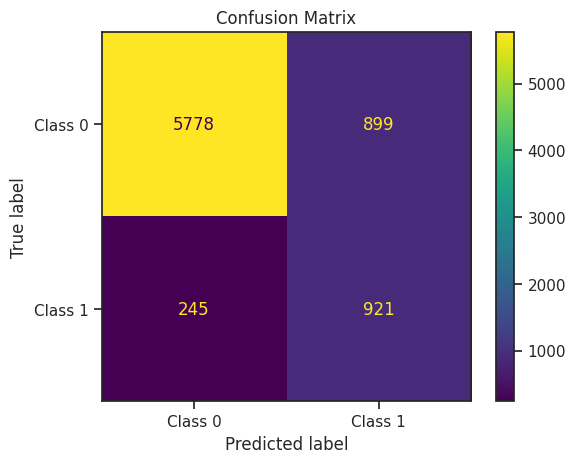

              precision    recall  f1-score   support

     Class 0       0.96      0.87      0.91      6677
     Class 1       0.51      0.79      0.62      1166

    accuracy                           0.85      7843
   macro avg       0.73      0.83      0.76      7843
weighted avg       0.89      0.85      0.87      7843



In [37]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

ConfusionMatrixDisplay.from_estimator(model_RF, X_Val, y_val, display_labels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.show()



y_val_pred = model_RF.predict(X_Val)

# Print classification report
print(classification_report(y_val, y_val_pred, target_names=['Class 0', 'Class 1']))

* **Strengths of the Model**
    * The model performs well for Class 0 (majority class), as indicated by its high precision (96%) and recall (87%).
    * The overall accuracy of 85% is relatively high.

* **Weaknesses of the Model**
    * The model struggles with Class 1 (minority class):
    * Low precision (51%): Nearly half of the instances predicted as Class 1 are incorrect, indicating a high false positive rate.
    * Moderate F1-score (62%): This suggests that the model has room for improvement in balancing precision and recall for the minority class.

**Class Imbalance**: The performance disparity between Class 0 and Class 1 suggests that the model is biased toward the majority class.

In [38]:
# Commented OUT Since it is used for making submission

y_test_pred = model_RF.predict(X_test)

submission_RF = pd.DataFrame({'id' : range(0, X_test.shape[0]),
                            'target': y_test_pred})

submission_RF.to_csv('submission.csv', index =False)

## Model-2 Implementing ADABOOST ALGORITHM

## HYPER PARAMETER TUNING ADABOOST ALGORITHM Parameters

In [39]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import RandomizedSearchCV

# # Define the base estimator (weak learner)
# base_estimator = DecisionTreeClassifier()

# # Define the parameter grid for RandomizedSearchCV
# adaboost_params = {
#     "n_estimators": [50, 100, 200,300,400],
#     "learning_rate": [0.01, 0.05, 0.1, 0.5, 1.0],
#     "estimator__max_depth": [1, 2, 3, 5],
#     "estimator__min_samples_split": [2, 5, 10],
#     "estimator__min_samples_leaf": [1, 2, 5],
#     "algorithm": ["SAMME", "SAMME.R"]
# }

# # Create the AdaBoost model
# adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# # Perform RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     adaboost, 
#     param_distributions=adaboost_params, 
#     cv=3, 
#     scoring='f1_macro',
#     n_iter=20, 
#     n_jobs=-1, 
#     verbose=2, 
#     random_state=42
# )

# # Fit the model
# random_search.fit(X_train_, y_train_)

# # Print the best parameters
# print("Best Parameters:", random_search.best_params_)

# Rationale:

* **n_estimators**: Specifies the number of weak learners (Decision Trees) to be used in the AdaBoost ensemble. Higher values improve the model's ability to capture more details in the data but increase training time and the risk of overfitting.
* **learning_rate**: Controls the contribution of each weak learner to the final model.A smaller learning rate improves generalization with more estimators, while a larger rate accelerates learning but risks overfitting.
* **estimator__max_depth**: Defines the maximum depth of the individual decision trees (weak learners). Shallow tree adhers to adaboost philosophy of iteratively improving error. Deep trees(5) capture more complex pattern but risking overfitting when combine with high no of estimators.
* **estimator__min_samples_split**: Sets the minimum number of samples required to split a node in each decision tree.Larger values enforce simpler trees to prevent overfitting, while smaller ones allow finer splits for detailed patterns.
* **estimator__min_samples_leaf**: Specifies the minimum number of samples required to be at a leaf node in the decision trees. Higher values (5) create simpler trees to avoid overfitting, while smaller (1,2) ones capture finer details but may overfit.
* **algorithm**: SAMME: Uses a discrete version of AdaBoost, where weak learners predict class labels and a weighted majority vote determines the final output.SAMME.R: The default and more commonly used version that uses weighted sum of the weak learners' real-valued predictions (log odds).

# Overall Strategy

* **Model complexity vs. performance**:Higher n_estimators and smaller learning_rate enhance pattern capture without overfitting.
* **Overfitting control**:Shallow max_depth and larger min_samples_split/min_samples_leaf prevent excessive complexity.
* **Efficient learning**:Moderate learning_rate and SAMME.R ensure balanced learning and stable convergence.
* **Tree behavior fine-tuning**:max_depth, min_samples_split, and min_samples_leaf keep trees simple yet effective.

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import pandas as pd



models = {
    "Adaboost": AdaBoostClassifier(
        estimator=DecisionTreeClassifier(
            max_depth=3,  # max depth of the tree
            min_samples_split=5,  # minimum samples to split
            min_samples_leaf=5,
            class_weight={0: 1, 1: 3}
        ),
        n_estimators=300,  # number of boosting rounds
        learning_rate=0.1,  # learning rate
        algorithm='SAMME.R',  # boosting algorithm
        random_state=42  # random seed for reproducibility
    )
}


model_AB = list(models.values())[0]
model_AB.fit(X_train_, y_train_) # Train model

# Make predictions

y_val_pred = model_AB.predict(X_Val)

model_train_f1 = f1_score(y_val, y_val_pred, average='macro')

print('- F1 score: {:.4f}'.format(model_train_f1))


- F1 score: 0.7643


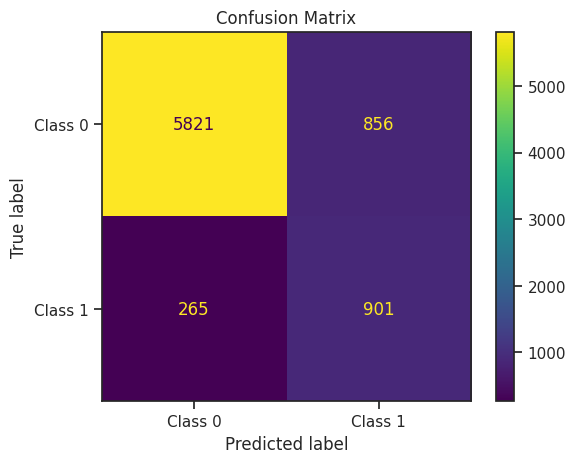

              precision    recall  f1-score   support

     Class 0       0.96      0.87      0.91      6677
     Class 1       0.51      0.77      0.62      1166

    accuracy                           0.86      7843
   macro avg       0.73      0.82      0.76      7843
weighted avg       0.89      0.86      0.87      7843



In [41]:
# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

ConfusionMatrixDisplay.from_estimator(model_AB, X_Val, y_val, display_labels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.show()



y_val_pred = model_AB.predict(X_Val)

# Print classification report
print(classification_report(y_val, y_val_pred, target_names=['Class 0', 'Class 1']))

# Insights

* There is no significant improvement in the performance of the AdaBoost algorithm compared to the Random Forest classifier.
* The challenges of achieving high precision and recall for class 1 persist, while there is still a good precision value for predicting class 0.

In [42]:
#  y_test_pred = model_AB.predict(X_test)

# submission_RF = pd.DataFrame({'id' : range(0, X_test.shape[0]),
#                             'target': y_test_pred})
# submission_RF.to_csv('submission.csv', index =False)

## Model-3 XGBOOST Algorithm Hyper Parameters Tuning

In [43]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import f1_score
# import numpy as np
# import pandas as pd

# from sklearn.preprocessing import LabelEncoder
# y_train = y_train.values.ravel()
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)

# # Hyperparameter grid for XGBoost
# param_dist = {
#     'n_estimators': [50, 100, 150, 200],
#     'learning_rate': [0.01,0.02, 0.05, 0.1, 0.2],1
#     'max_depth': [3, 5, 7, 8,9],
#     'min_child_weight': [1,2, 3, 5],
#     'subsample': [0.6, 0.8, 0.9, 1.0],
#     'colsample_bytree': [0.5,0.6, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.5],
#     'reg_alpha': [0, 0.1, 1,2,3,4,5],
#     'reg_lambda': [0.1, 1, 2,3, 4, 10],
#     'scale_pos_weight': [1, 2]
# }

# # Initialize XGBClassifier
# xgb = XGBClassifier(use_label_encoder=False, random_state=42)

# # RandomizedSearchCV
# le = LabelEncoder()
# y_train_ = le.fit_transform(y_train_)
# y_val = le.transform(y_val)

# for name, model, params in randomcv_models:
#     random = RandomizedSearchCV(estimator=model,
#                                    param_distributions=params,
#                                    n_iter=20,
#                                    cv=3,
#                                    verbose=2,
#                                    n_jobs=-1)
#     random.fit(X_train_, y_train_)
#     model_param[name] = random.best_params_

# for model_name in model_param:
#     print(f"---------------- Best Params for {model_name} -------------------")
#     print(model_param[model_name])

# Rationale:
* **n_estimators**: Number of trees; higher values capture more details but may lead to overfitting and longer training.
* **learning_rate**: Controls how much each tree contributes. Smaller values improve generalization but need more trees.
* **max_depth**: Limits tree depth; shallow trees reduce overfitting, but deeper trees capture more complex patterns.
* **min_child_weight**: Minimum sum of weights needed for a split. Higher values simplify trees and reduce overfitting.
* **subsample**: Fraction of data used per tree. Values between 0.6 and 1.0 help avoid overfitting.
* **colsample_bytree**: Fraction of features used per tree. Helps reduce overfitting by preventing reliance on few features.
* **gamma**: Minimum loss reduction for a split. Higher values make the model more conservative.
* **reg_alpha and reg_lambda**: L1 and L2 regularization to prevent overfitting. L1 reduces feature usage; L2 shrinks coefficients.
* **scale_pos_weight**: Adjusts weight for imbalanced classes. Increases focus on the minority class.

# Overall Strategy

* **Balance Complexity and Performance**: Adjust n_estimators and learning_rate to capture complex patterns without overfitting.
* **Control Overfitting**: Use max_depth, min_child_weight, subsample, and colsample_bytree to prevent overly complex models.
* **Regularization**: Fine-tune reg_alpha and reg_lambda to reduce overfitting and enhance model stability.
* **Handle Imbalanced Classes**: Set scale_pos_weight to address class imbalance and ensure minority class recognition.
* **Efficient Hyperparameter Tuning**: Leverage RandomizedSearchCV for a broad but efficient search in hyperparameter space.
* **Cross-Validation and Parallel Processing**: Use cv=3 for robust evaluation and n_jobs=-1 to speed up the process.


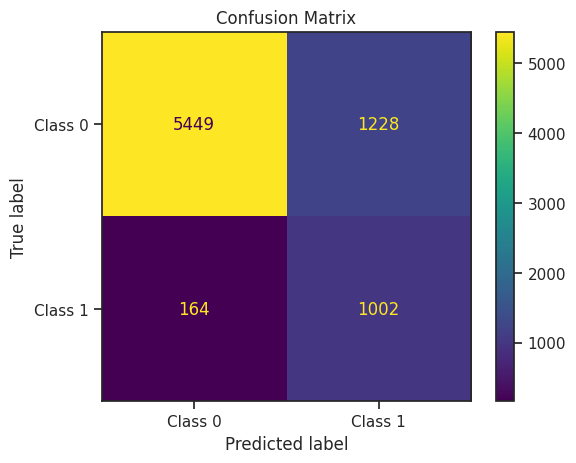

- F1 score: 0.7384
              precision    recall  f1-score   support

     Class 0       0.97      0.82      0.89      6677
     Class 1       0.45      0.86      0.59      1166

    accuracy                           0.82      7843
   macro avg       0.71      0.84      0.74      7843
weighted avg       0.89      0.82      0.84      7843



In [44]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, ConfusionMatrixDisplay,classification_report
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')


xgb =  XGBClassifier(
    use_label_encoder=False, 
    random_state=42,
    n_estimators=150, 
    max_depth=8,  # You can choose an appropriate max_depth
    learning_rate=0.03,  # This is commonly tuned in XGBoost
    subsample=0.98,  # Controls the fraction of samples used for each tree
    colsample_bytree=0.6,  # Controls the fraction of features used for each tree
    scale_pos_weight=2,# Used for imbalanced classes
    reg_lambda= 4,
    reg_alpha=  4,
    min_child_weight= 1,
    gamma = 0
)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train__smote, y_train__smote = smote.fit_resample(X_train_, y_train_)
# X_Val_smote, y_val__smote = smote.fit_resample(X_Val, y_val)

# Train the model
xgb.fit(X_train__smote, y_train__smote)



ConfusionMatrixDisplay.from_estimator(xgb, X_Val, y_val, display_labels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.show()


y_val_pred = xgb.predict(X_Val)

model_train_f1 = f1_score(y_val, y_val_pred, average='macro')

print('- F1 score: {:.4f}'.format(model_train_f1))

# Print classification report
print(classification_report(y_val, y_val_pred, target_names=['Class 0', 'Class 1']))


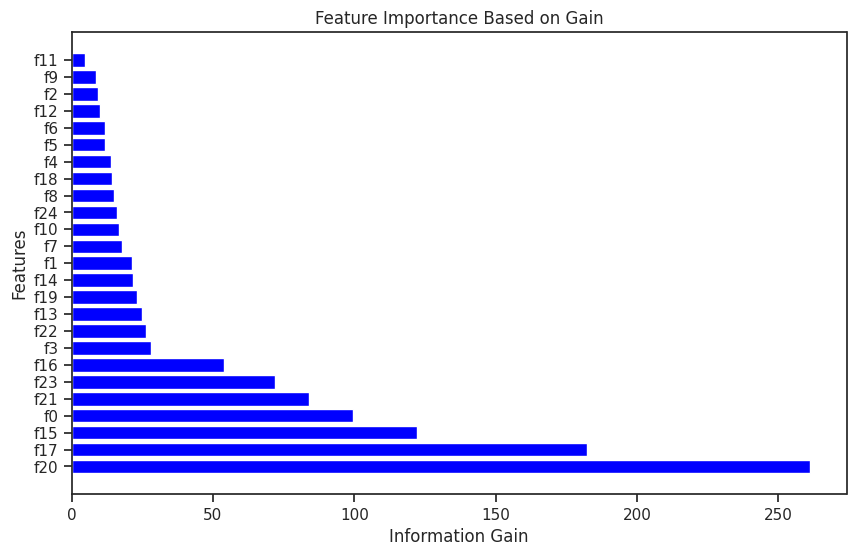

In [45]:
import matplotlib.pyplot as plt

# Plot feature importance based on 'Gain'
xgboost_importance = xgb.get_booster().get_score(importance_type='gain')
xgboost_importance = dict(sorted(xgboost_importance.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10, 6))
plt.barh(list(xgboost_importance.keys()), list(xgboost_importance.values()), color='blue')
plt.xlabel("Information Gain")
plt.ylabel("Features")
plt.title("Feature Importance Based on Gain")
plt.show()

In [46]:
feature_importance = xgb.get_booster().get_score(importance_type='gain')

# Sort features by importance
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

feature_names = list(feature_importance.keys())
X_train_smote = pd.DataFrame(X_train__smote, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)
X_Val = pd.DataFrame(X_Val, columns=feature_names)

# Print the sorted features
print("Feature Importance Based on Gain:")
for feature, gain in sorted_features:
    print(f"{feature}: {gain}")

# Select features with gain > threshold (e.g., 20)
selected_features = [feature for feature, gain in sorted_features if gain >11 ]
print("\nSelected Features:", selected_features)

Feature Importance Based on Gain:
f20: 261.0311584472656
f17: 182.3196258544922
f15: 122.2452621459961
f0: 99.38683319091797
f21: 83.92355346679688
f23: 72.08316802978516
f16: 54.02397918701172
f3: 28.158634185791016
f22: 26.365867614746094
f13: 24.856014251708984
f19: 23.00524139404297
f14: 21.756427764892578
f1: 21.226457595825195
f7: 17.760953903198242
f10: 16.76034164428711
f24: 16.14633560180664
f8: 15.114977836608887
f18: 14.37669563293457
f4: 14.140115737915039
f5: 11.977095603942871
f6: 11.678504943847656
f12: 10.155782699584961
f2: 9.253024101257324
f9: 8.555529594421387
f11: 4.83656120300293

Selected Features: ['f20', 'f17', 'f15', 'f0', 'f21', 'f23', 'f16', 'f3', 'f22', 'f13', 'f19', 'f14', 'f1', 'f7', 'f10', 'f24', 'f8', 'f18', 'f4', 'f5', 'f6']


In [47]:
print(len(selected_features))
X_train_smote_filtered = X_train_smote[selected_features]
X_test_filtered = X_test[selected_features]
X_Val_filtered = X_Val[selected_features]

21


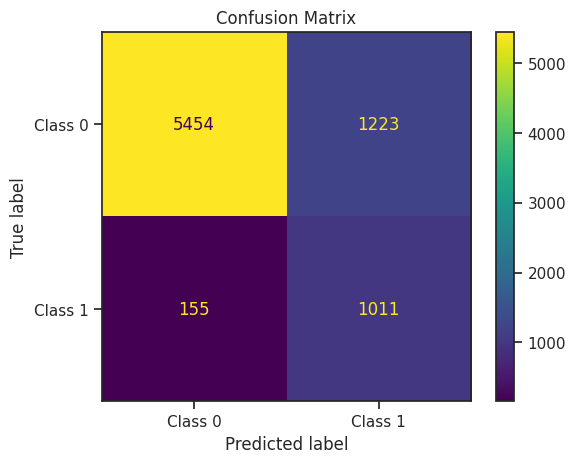

F1 Score After Retraining: 0.7413


In [48]:
xgb_2 =  XGBClassifier(
    use_label_encoder=False, 
    random_state=42,
    n_estimators=150, 
    max_depth=8,  # You can choose an appropriate max_depth
    learning_rate=0.03,  # This is commonly tuned in XGBoost
    subsample=0.98,  # Controls the fraction of samples used for each tree
    colsample_bytree=0.6,  # Controls the fraction of features used for each tree
    scale_pos_weight=2,# Used for imbalanced classes
    reg_lambda= 4,
    reg_alpha=  4,
    min_child_weight= 1,
    gamma = 0
)

X_train_smote_filtered = X_train_smote[selected_features]
X_test_filtered = X_test[selected_features]
X_Val_filtered = X_Val[selected_features]

model_retrained = xgb_2  # Use previously optimized hyperparameters
model_retrained.fit(X_train_smote_filtered,  y_train__smote)

ConfusionMatrixDisplay.from_estimator(xgb_2, X_Val_filtered, y_val, display_labels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.show()


# Evaluate on the validation set
y_val_pred = model_retrained.predict(X_Val_filtered )
f1 = f1_score(y_val, y_val_pred, average='macro')
print(f"F1 Score After Retraining: {f1:.4f}")

In [49]:
y_test_pred = model_retrained.predict(X_test_filtered)
mapping = {0: "no", 1: "yes"}
y_test_pred_mapped = [mapping[label] for label in y_test_pred]
# Prepare the submission
submission_RF = pd.DataFrame({'id': range(0, X_test_filtered.shape[0]), 'target': y_test_pred_mapped})
submission_RF.to_csv('submission.csv', index=False)

# Insights

* The XGBoost algorithm performs very well on the majority class (Class 0) but struggles significantly with the minority class (Class 1).

In [50]:
y_test_pred = xgb_2.predict(X_test_filtered)
mapping = {0: "no", 1: "yes"}
y_test_pred_mapped = [mapping[label] for label in y_test_pred]
# Prepare the submission
submission_RF = pd.DataFrame({'id': range(0, X_test.shape[0]), 'target': y_test_pred_mapped})
submission_RF.to_csv('submission.csv', index=False)

# Section-7 Model comparison

# Plotting AUC-ROC Curve For All Three Trained Models

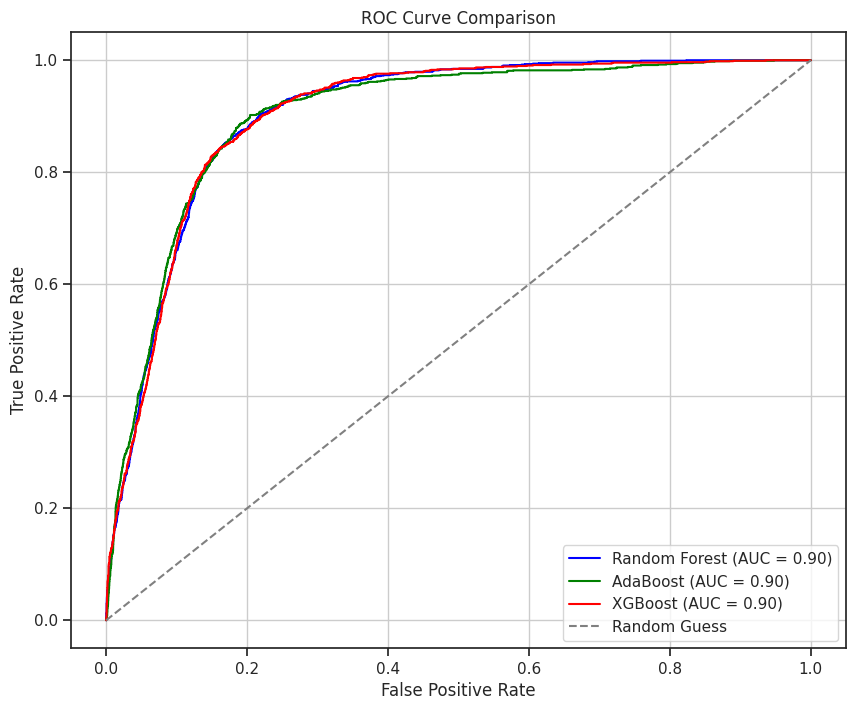

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score



# Generate predictions for each model
y_pred_RF = model_RF.predict_proba(X_Val)[:, 1]  # Probabilities for Class 1
y_pred_AB = model_AB.predict_proba(X_Val)[:, 1]
y_pred_XGB = xgb.predict_proba(X_Val)[:, 1]

# Compute ROC curve and AUC for each model
fpr_RF, tpr_RF, _ = roc_curve(y_val, y_pred_RF)
auc_RF = roc_auc_score(y_val, y_pred_RF)

fpr_AB, tpr_AB, _ = roc_curve(y_val, y_pred_AB)
auc_AB = roc_auc_score(y_val, y_pred_AB)

fpr_XGB, tpr_XGB, _ = roc_curve(y_val, y_pred_XGB)
auc_XGB = roc_auc_score(y_val, y_pred_XGB)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_RF, tpr_RF, label=f"Random Forest (AUC = {auc_RF:.2f})", color='blue')
plt.plot(fpr_AB, tpr_AB, label=f"AdaBoost (AUC = {auc_AB:.2f})", color='green')
plt.plot(fpr_XGB, tpr_XGB, label=f"XGBoost (AUC = {auc_XGB:.2f})", color='red')

# Plot the diagonal line (random guessing)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()

# Show the plot
plt.show()


# Actionable Takeaways

1. **XGBoost as a Preferred Model**
    * With a slightly higher AUC, XGBoost might be preferred if our goal is to maximize classification performance.
    * The XGBoost model achieves a slightly higher AUC (0.91), indicating it has a marginally better ability to separate the two classes compared to Random Forest and AdaBoost.


2. **Model Performance Across Thresholds**
    * All three models have high TPR at low FPR, which indicates that the models effectively classify positive cases with minimal false alarms.
    * All three models are significantly above the random guess line, showing that they perform far better than chance.

3. **Further Tuning**
   * The similarity in performance suggests the need for further hyperparameter tuning or feature engineering to explore improvements.

# Plotting the F1-Score for All the Three Trained Models

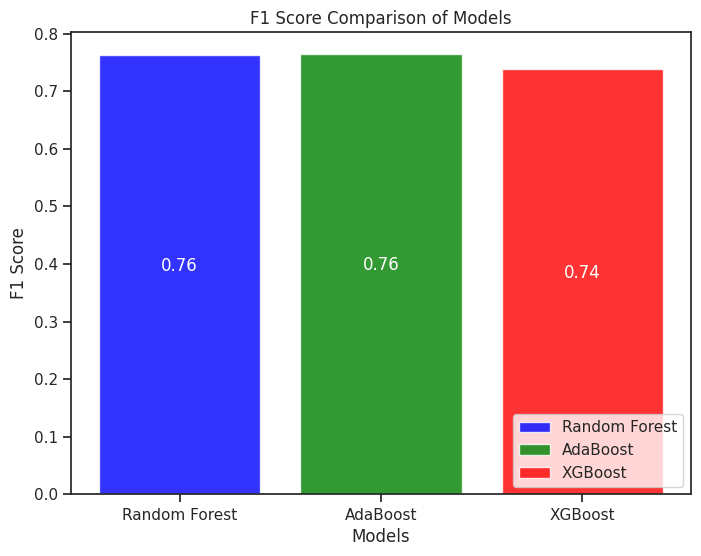

In [52]:
from sklearn.metrics import f1_score

y_pred_RF = model_RF.predict(X_Val)  # Replace X_Val with your test dataset
y_pred_AB = model_AB.predict(X_Val)
y_pred_XGB = xgb.predict(X_Val)

# Calculate F1 scores
f1_RF = f1_score(y_val, y_pred_RF, average='macro')
f1_AB = f1_score(y_val, y_pred_AB, average='macro')
f1_XGB = f1_score(y_val, y_pred_XGB, average='macro')

# Store F1 scores in a dictionary
f1_scores = {
    "Random Forest": f1_RF,
    "AdaBoost": f1_AB,
    "XGBoost": f1_XGB
}

# Extract model names and their F1 scores
models = list(f1_scores.keys())
scores = list(f1_scores.values())

# Bar chart parameters
colors = ['blue', 'green', 'red']  # Different colors for each bar
x_pos = np.arange(len(models))  # Positions for bars

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(x_pos, scores, color=colors, alpha=0.8)

# Add F1 score values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height/2 , f"{height:.2f}",
             ha='center', va='bottom', color='white', fontsize=12)

# Add legend
plt.legend(bars, models, loc='lower right')

# Chart labels and title
plt.xticks(x_pos, models)
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("F1 Score Comparison of Models")

# Display the chart
plt.show()

# Actionable Takeaways

* Random Forest and AdaBoost both have the same F1 score of 0.76, indicating that their performance is equivalent in terms of balancing precision and recall.
* XGBoost, while slightly behind in F1 score, may still be valuable if its performance is better on other metrics (AUC)
* The lower score might indicate that XGBoost requires further hyperparameter tuning or adjustments in its configuration.